# DSC 550 Project Milestone1
# Aditya Sumbaraju
# 07/15/2021

In [143]:
import pandas as pd
import numpy as np 
import yellowbrick
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from yellowbrick.features import Rank2D
from yellowbrick.features import ParallelCoordinates
from yellowbrick.style import set_palette

In [129]:
#Step 1: Load data into a dataframe
bc_df = "C:\BU\DSC550\project\data/data.csv"
data = pd.read_csv(bc_df)


# Data cleansing Steps

In [130]:
#deleting the "id" column
data.drop("id",axis=1,inplace=True)

# print the summary of the dataset
print (data.info())

#count total rows in each column which contain null values
print ("\n \n Check for null values \n", data.isna().sum())
       

#'duplicated()' function in pandas return the duplicate row as True and othter as False

print(" \n \n  Dupe Check \n" , sum(data.duplicated()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [131]:
# check the dimension of the table
print("The dimension of the table is: ", data.shape)

The dimension of the table is:  (569, 31)


In [132]:
#Summarizing the numerical data and categorical data
print("BC Numerical data summary:")
print(data.describe())
print("BC Categorical data summary:")
print(data.describe(include=['O']))

BC Numerical data summary:
       radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000       

<Figure size 640x480 with 0 Axes>

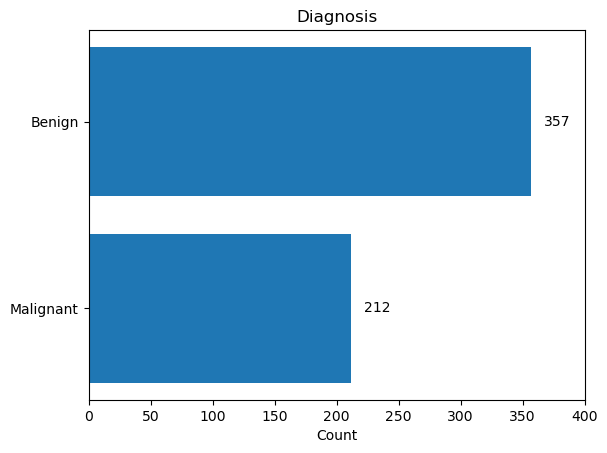

In [133]:
# Bar chart
plt.rcdefaults()
plt.figure()
benign = len(data[data['diagnosis'] == 'B'])
malignant = len(data[data['diagnosis'] == 'M'])
fig, ax = plt.subplots()
y = ('Benign', 'Malignant')
y_pos = np.arange(len(y))
x = (benign, malignant)
ax.barh(y_pos, x, align='center')
ax.set_xticks(np.arange(0,401,50))
ax.set_yticks(y_pos)
ax.set_yticklabels(y)
ax.invert_yaxis() # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Diagnosis')
for i, v in enumerate(x):
    ax.text(v + 10, i, str(v), color='black', va='center', fontweight='normal')
plt.show()

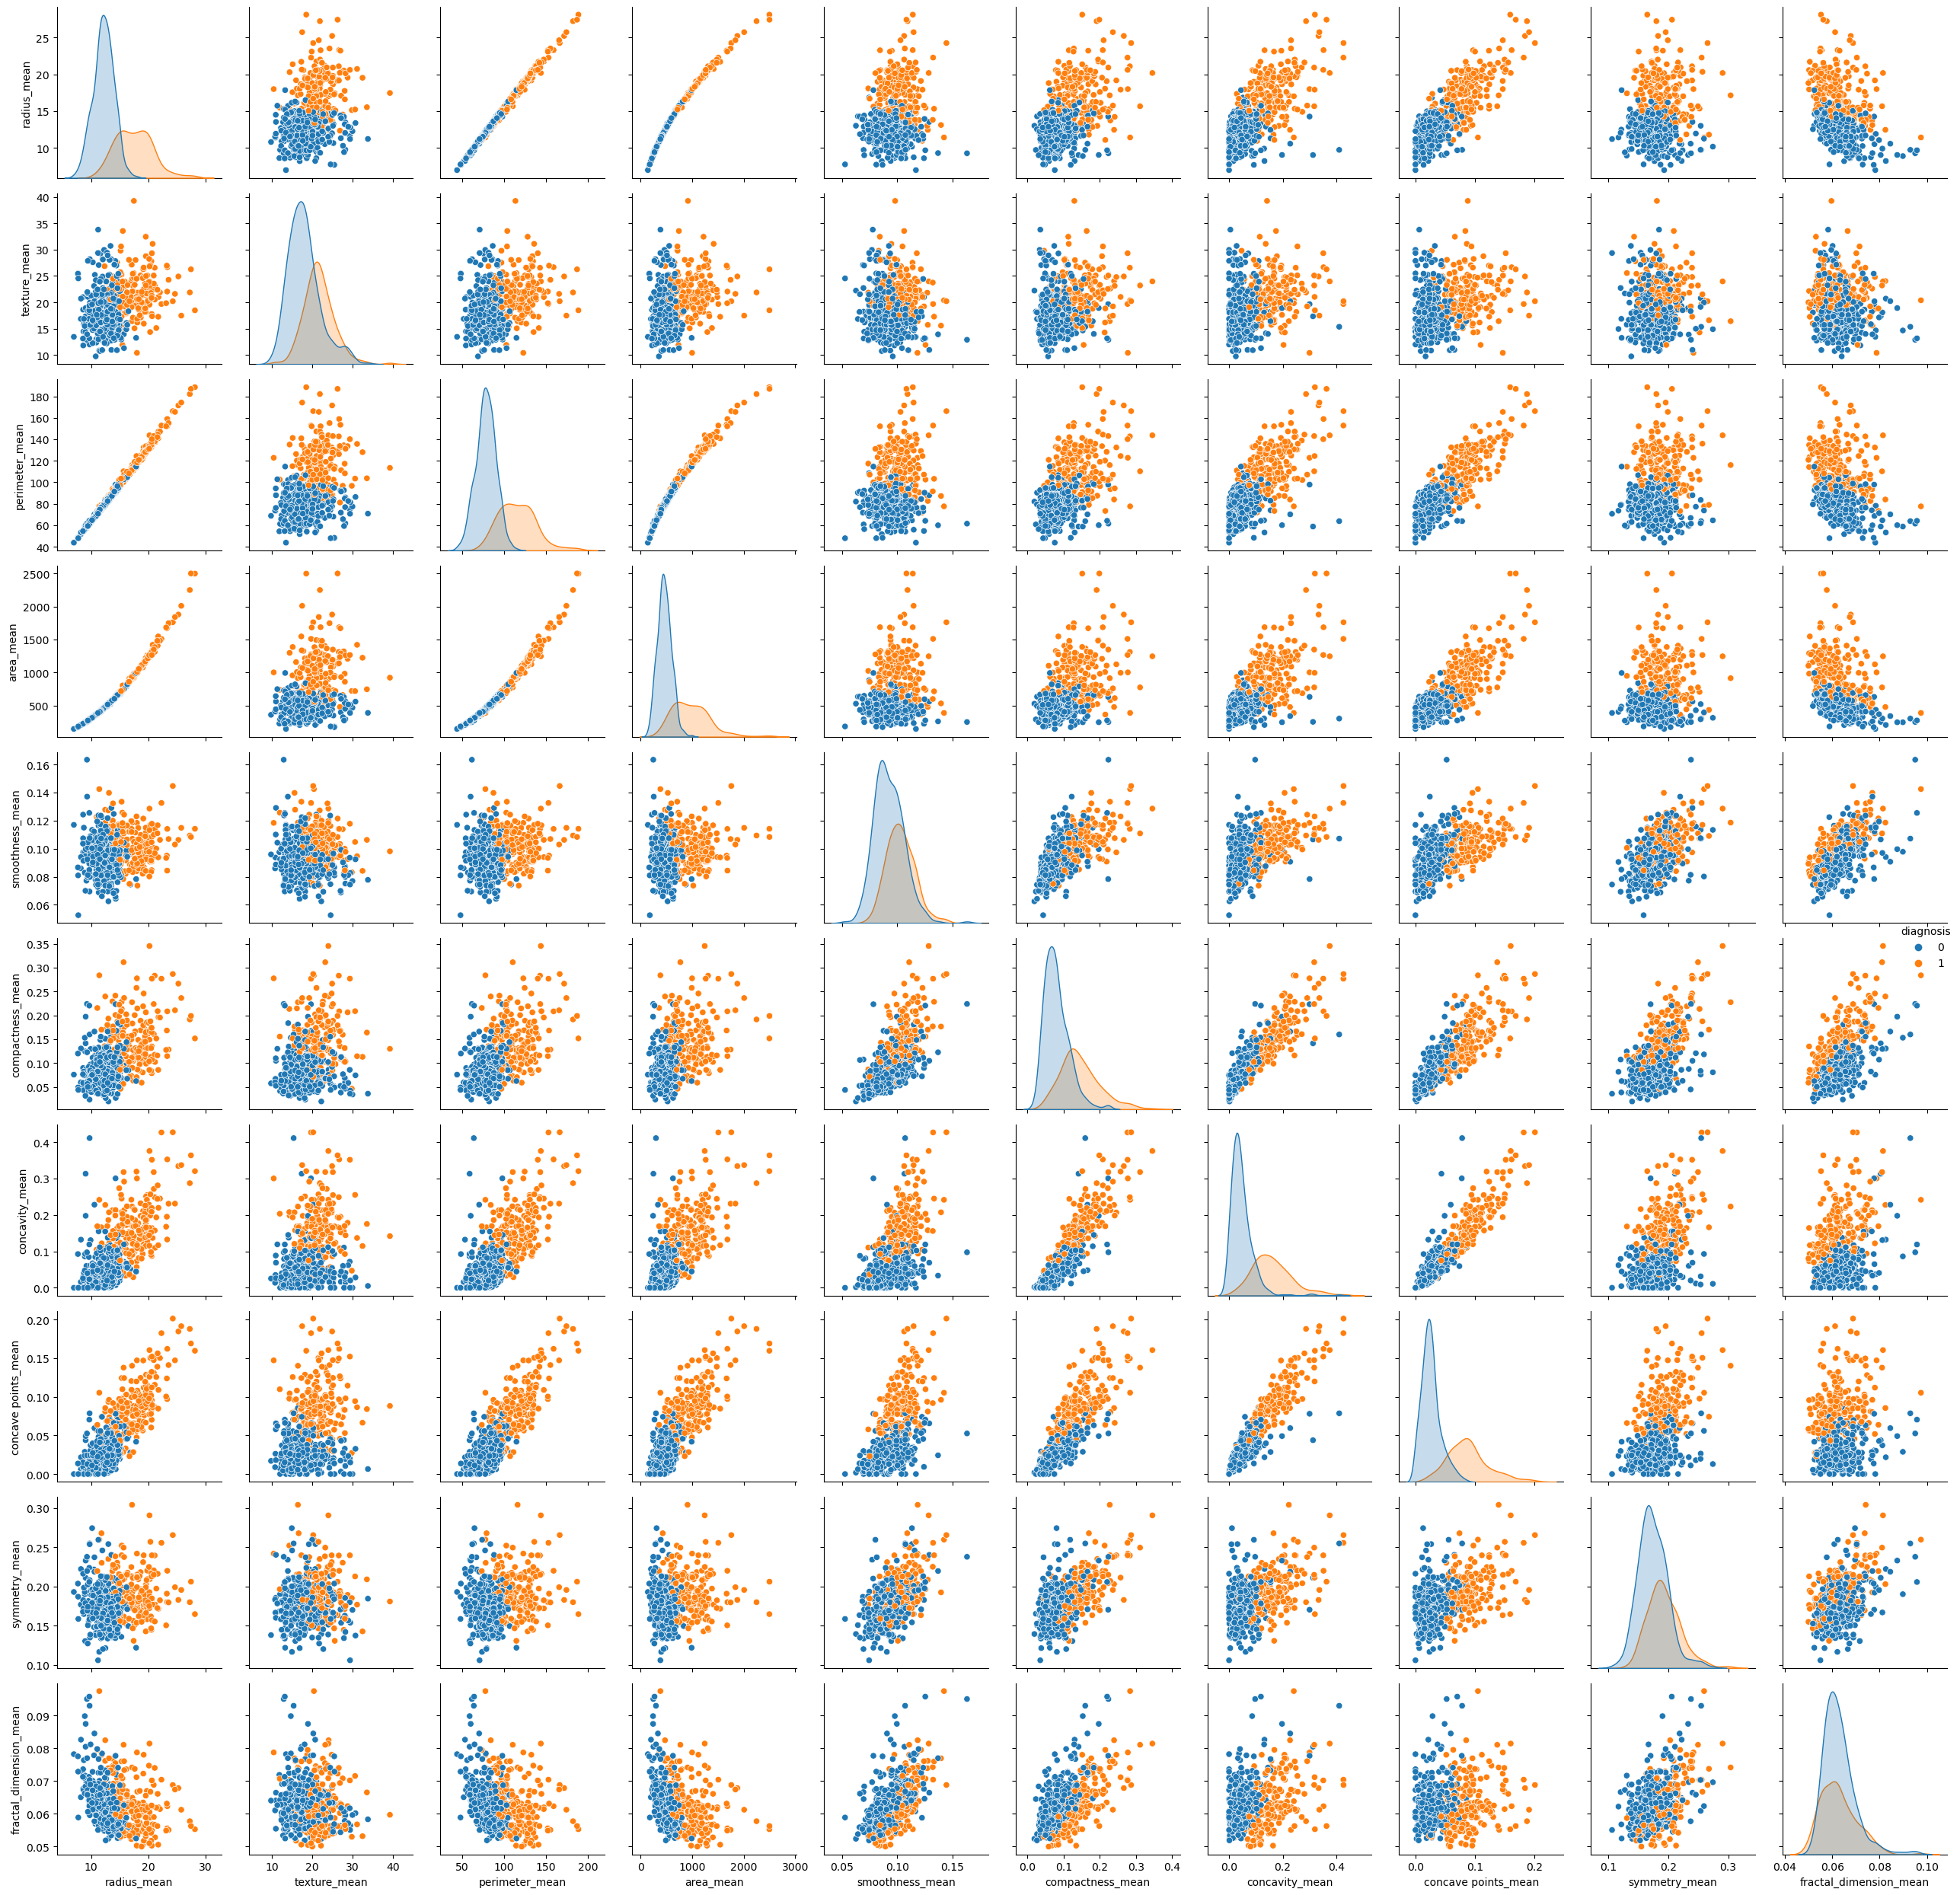

In [134]:
# Vizualize Correlations Between "mean" Features 
cols = ['radius_mean', 'texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']

sns.pairplot(df,vars = cols, size=2.5,hue = 'diagnosis')
plt.tight_layout()
plt.show()

<AxesSubplot:>

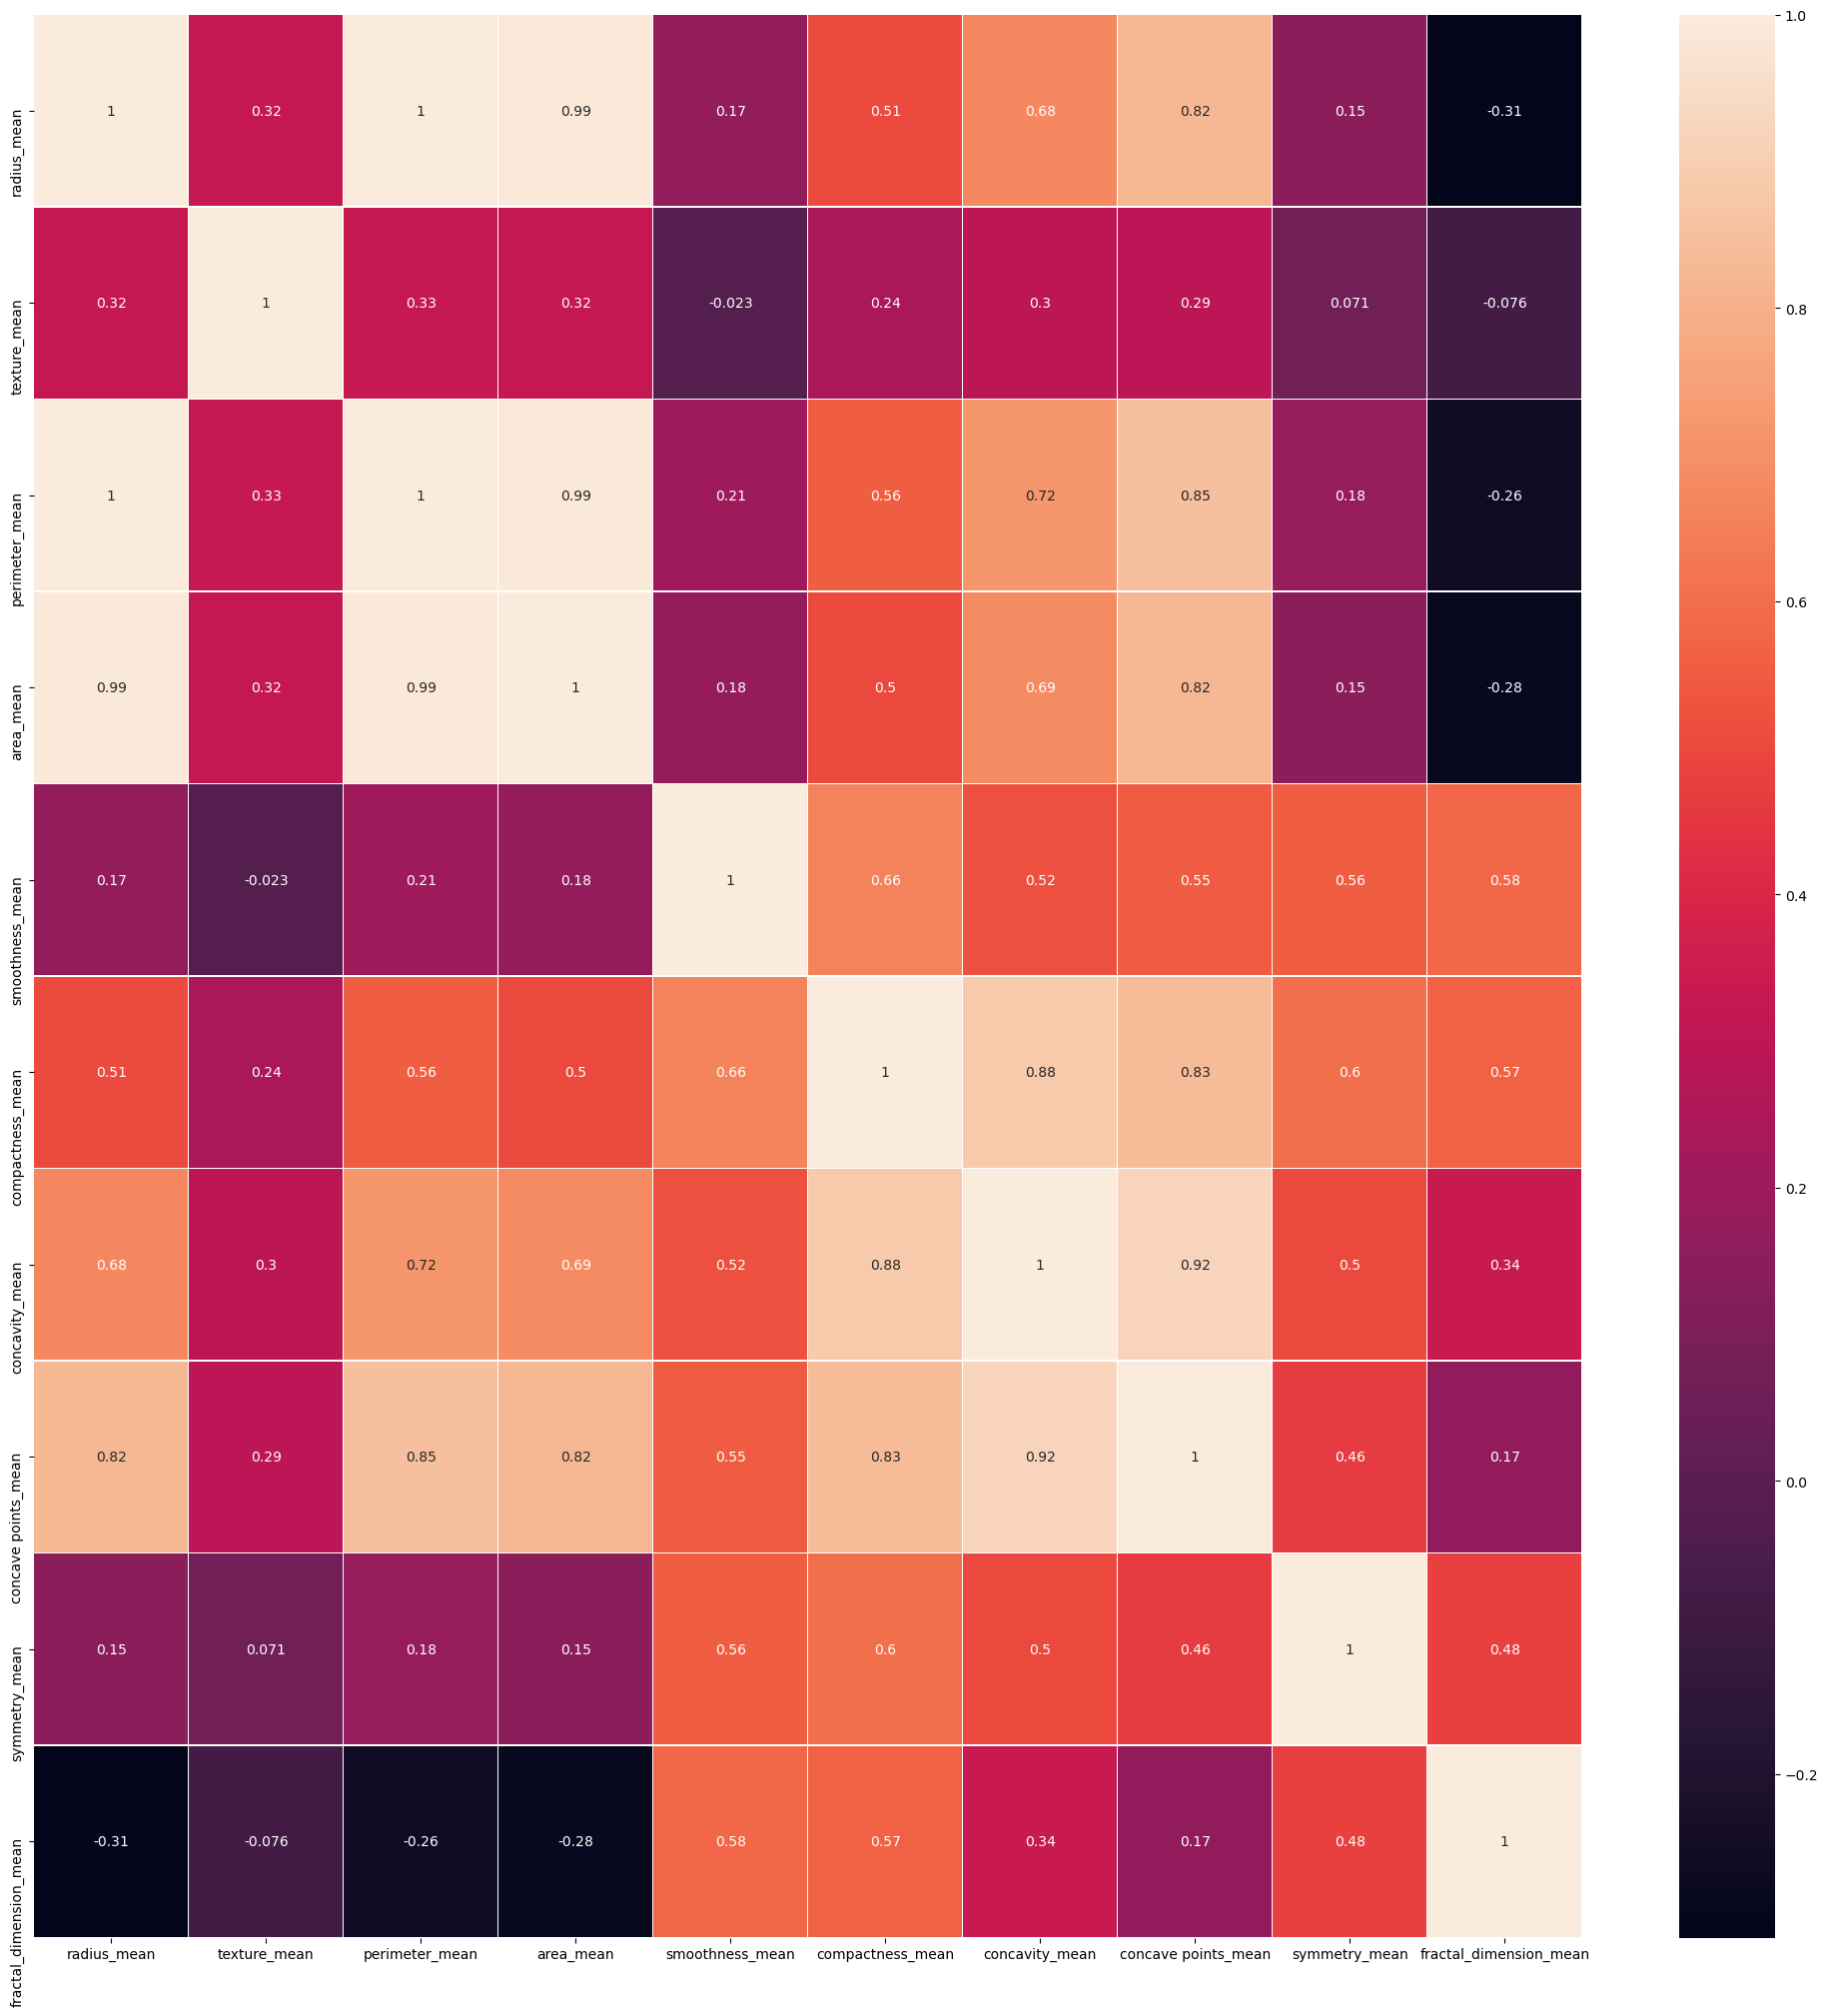

In [135]:
# Since there are 33 features, let check for multicollinearity for "Mean" features
# Let us use heatmap function
plt.figure(figsize = (25, 25))
sns.heatmap(df[cols].corr(), annot = True, linewidths = 0.20)

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 1.471e-01, 2.419e-01,
        7.871e-02],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 7.017e-02, 1.812e-01,
        5.667e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 1.279e-01, 2.069e-01,
        5.999e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 5.302e-02, 1.590e-01,
        5.648e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 1.520e-01, 2.397e-01,
        7.016e-02],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 1.587e-01,
        5.884e-02]])

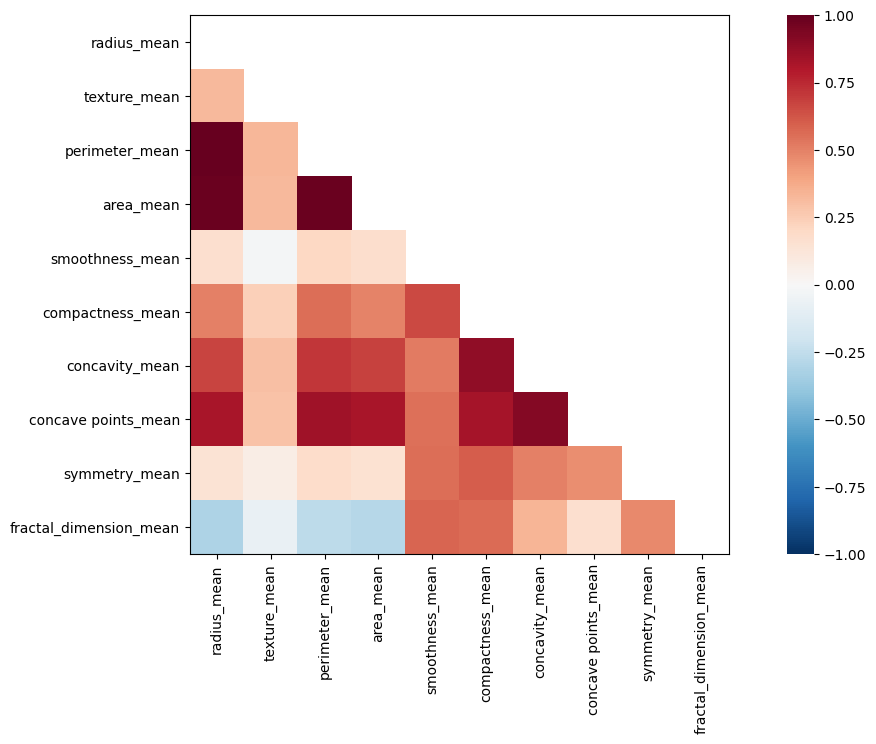

In [136]:
# Pearson Ranking
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
X = data[cols].values
fig = Rank2D(features=cols, algorithm='pearson')
fig.fit(X) 
fig.transform(X)

In [137]:
# Barcharts: set up the figure size
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})
features_mean=list(data.columns[1:29])
# split dataframe into two based on diagnosis
dfM=data[data['diagnosis'] ==1]
dfB=data[data['diagnosis'] ==0]

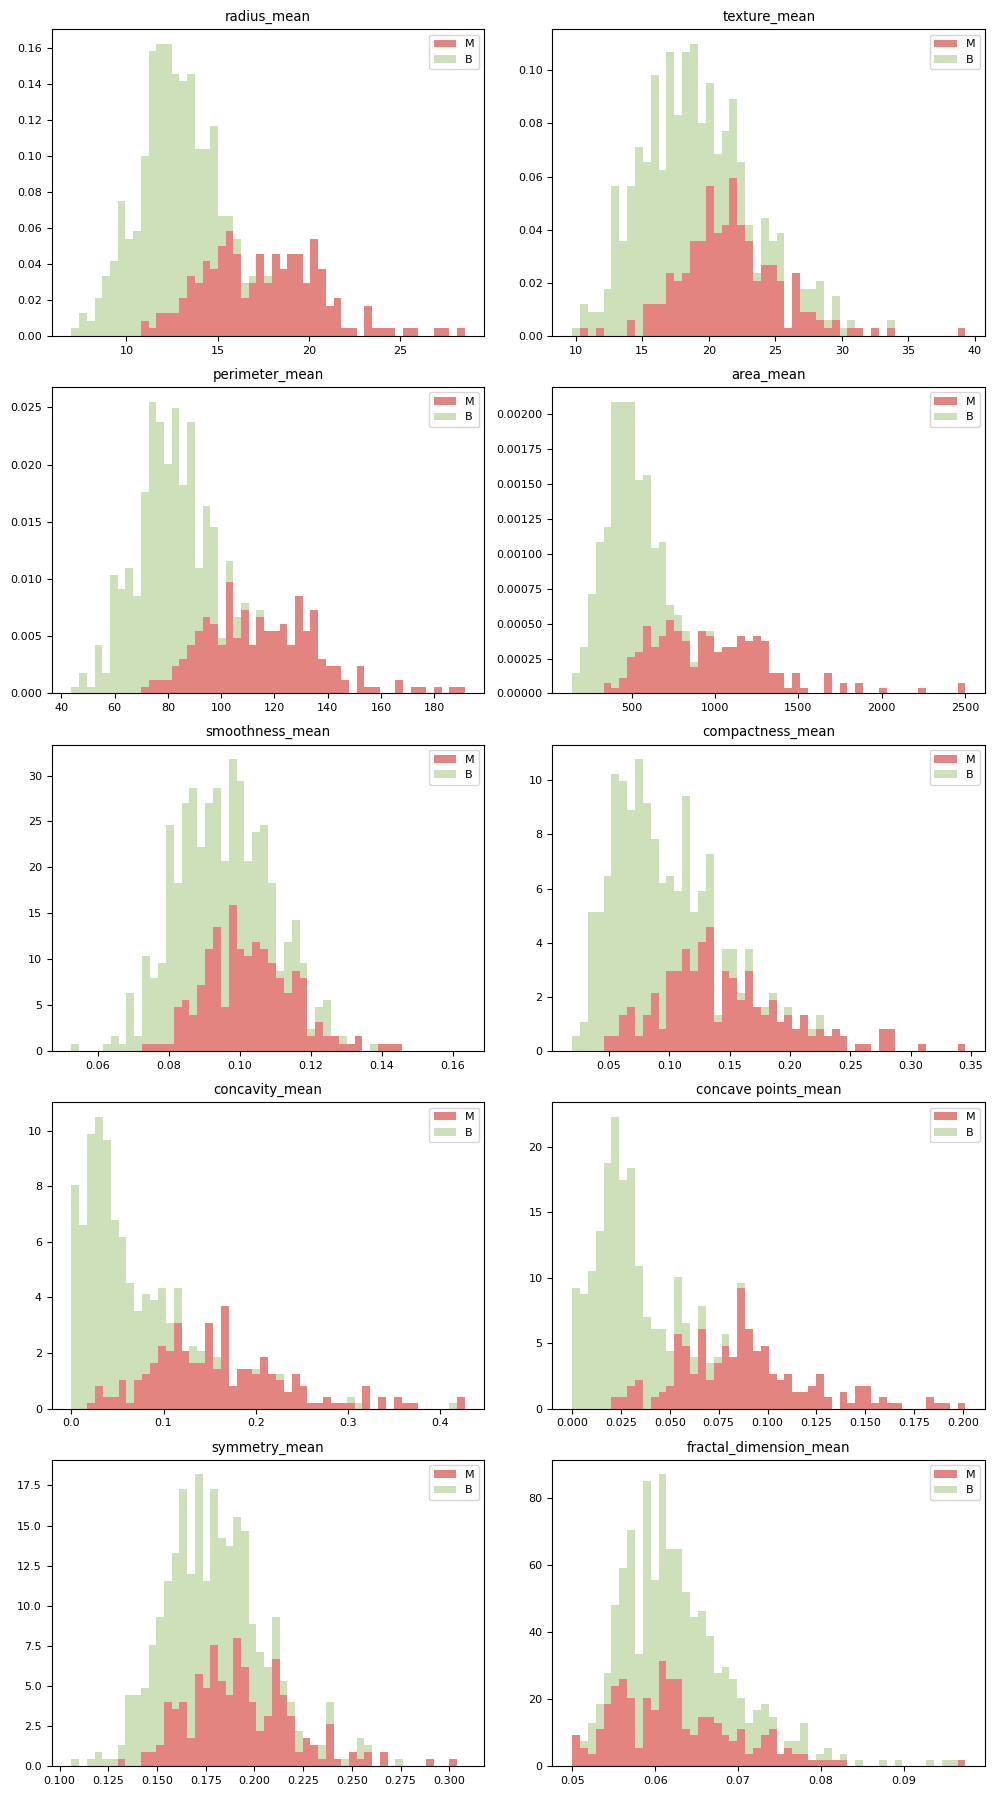

In [138]:
#Stack the data
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10,18))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, density = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

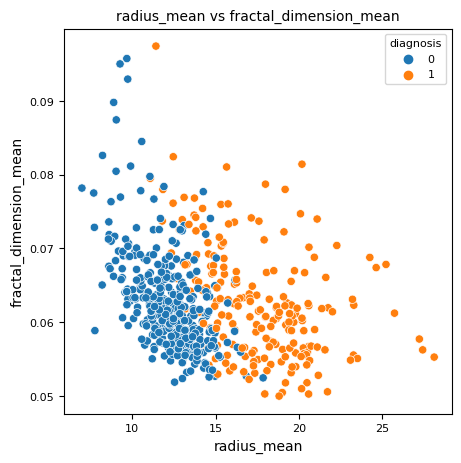

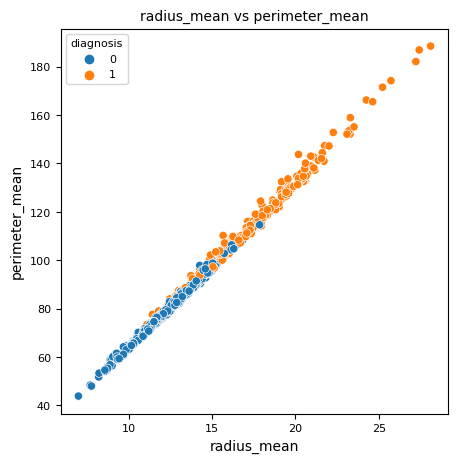

In [139]:

# The highly corelated pairs are:  
# radius_mean vs fractal_dimension_mean
# radius_mean vs perimeter_mean


plt.figure(figsize = (5,5))
sns.scatterplot(x = 'radius_mean', y ='fractal_dimension_mean', hue = 'diagnosis', data = df)
plt.xlabel('radius_mean', fontsize = 10)
plt.ylabel('fractal_dimension_mean', fontsize = 10)
plt.title('radius_mean vs fractal_dimension_mean', fontsize = 10)
plt.show()


plt.figure(figsize = (5,5))
sns.scatterplot(x = 'radius_mean', y = 'perimeter_mean', hue = 'diagnosis', data = df)
plt.xlabel('radius_mean', fontsize = 10)
plt.ylabel('perimeter_mean', fontsize = 10)
plt.title('radius_mean vs perimeter_mean', fontsize = 10)
plt.show()


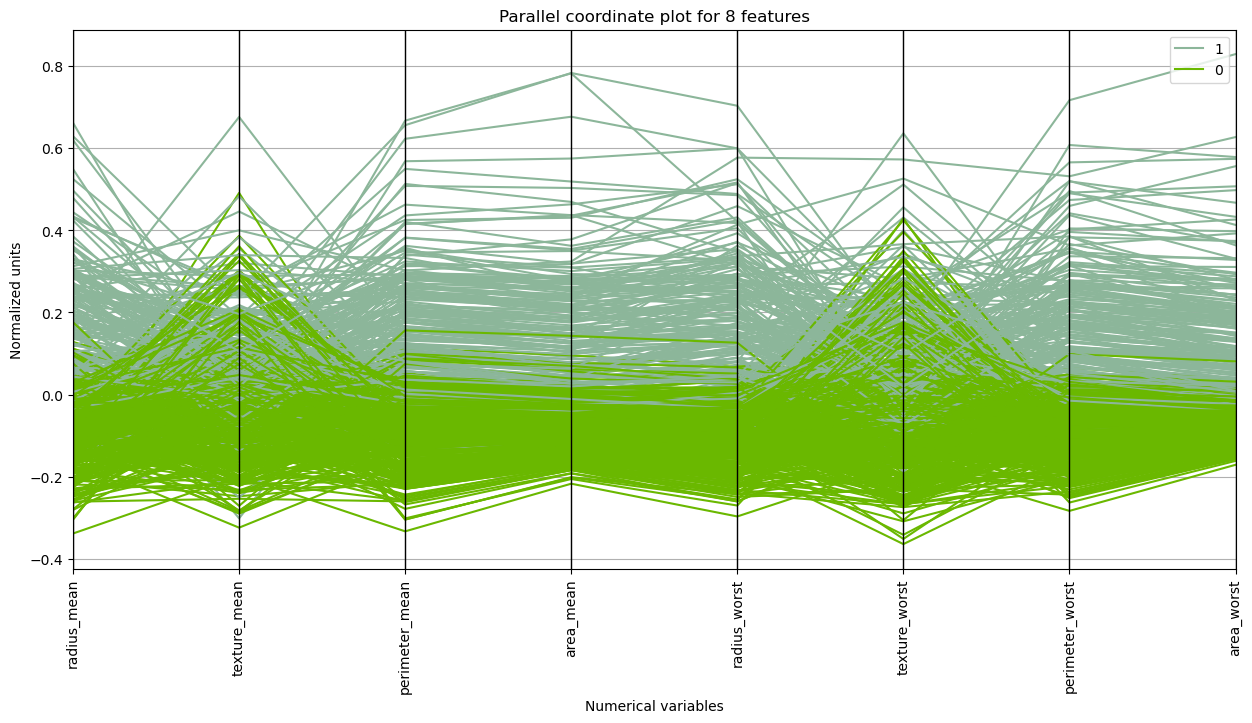

In [149]:
# Parallel coordinate plot for the numerical variables to compare the features mean vs worst

#%matplotlib inline
cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean','radius_worst',  'texture_worst',  'perimeter_worst', 'area_worst']

# copy data to a new dataframe
data_norm = data.copy()

for feature in cols:
    data_norm[feature] = (data[feature] - data[feature].mean(skipna=True)) / (data[feature].max(skipna=True) - data[feature].min(skipna=True))

pd.plotting.parallel_coordinates(data_norm, class_column = 'diagnosis', cols = cols)
plt.xlabel('Numerical variables')
plt.ylabel('Normalized units')
plt.title('Parallel coordinate plot for 8 features')
plt.xticks(rotation = 90)
plt.show()